In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import os
from scipy import stats

try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark
from main.draw_tools.stacking_with_error_bars import MC_stack_plot, MC_stack_plot_density

from main.data_tools.error_bars import make_data_weight
from main.data_tools.query_dataframes import cut_dfs_7types

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# Specify the path of the directory you want to list
directory_path = '/home/belle2/jaeyoung/storage_ghi/Ntuples_ghi_2/MC15ri_generic'
directory_path = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_generic'

# Use os.listdir() to get a list of all the files and directories in the specified directory
directories = [d for d in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, d))]

print("List of directories:")
for directory in directories:
    print(directory)

List of directories:
MC15ri_etaetapip_loose_v0_240505_etapi0const
MC15ri_etaetapip_loose_v0_240505_etapi0const_mva2
MC15ri_etaetapip_loose_v0_240505_etapi0const_onlybkg
MC15ri_etaetapip_loose_v0_240505_etapi0const_trainv2
MC15ri_etaetapip_pre_sel_240310_treefit
MC15ri_etaetapip_tight_v2_240419_Kp_BCS_etapi0const
MC15ri_Kspip_tight_v2_240420


In [33]:
# base_file_loc = '/home/belle2/jaeyoung/storage_ghi/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_pre_cut_240228/'
# base_file_loc = '/home/belle2/jaeyoung/storage_ghi/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_pre_sel_240306/'
base_file_loc = '/home/belle2/jaeyoung/storage_ghi/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_pre_sel_240307_treefit/'
base_file_loc = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_pre_sel_240310_treefit/'
base_file_loc = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_tight_v1_240405_treefit_BCS_etapi0const/'
base_file_loc = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_loose_v0_240505_etapi0const_mva2/'
base_file_loc = '/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_loose_v0_240505_etapi0const_mva2/'
base_file_loc = '/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_loose_v0_240505_etapi0const_trainv2/'


In [34]:
generic_ccbar = base_file_loc + 'ccbar/*.root'
# phigamma_ccbar = base_file_loc + 'topo/generic_ccbar.root'
# phigamma_ccbar = base_file_loc + 'topo/resultfile/result_phi/standard.root'

generic_uubar = base_file_loc + 'uubar/*.root'
generic_ddbar = base_file_loc + 'ddbar/*.root'
generic_ssbar = base_file_loc + 'ssbar/*.root'
generic_charged = base_file_loc + 'charged/*.root'
generic_mixed = base_file_loc + 'mixed/*.root'
generic_taupair = base_file_loc + 'taupair/*.root'

In [35]:
base_filter=' Dp_M>0'
base_filter='etapip_pipipi_K_rank==1'
base_filter+= '  && bdt>0.4'

# base_filter += ' && ((etapip_pi0_gamma1_clusterReg==1 && etapip_pi0_gamma1_E>0.05) || (etapip_pi0_gamma1_clusterReg==3 && etapip_pi0_gamma1_E>0.075) || (etapip_pi0_gamma1_clusterReg==2 && etapip_pi0_gamma1_E>0.05))'
# base_filter += ' && ((etapip_pi0_gamma2_clusterReg==1 && etapip_pi0_gamma2_E>0.05) || (etapip_pi0_gamma2_clusterReg==3 && etapip_pi0_gamma2_E>0.075) || (etapip_pi0_gamma2_clusterReg==2 && etapip_pi0_gamma2_E>0.05))'
# base_filter+= ' && abs(etapip_Eta_daughterDiffOfPhi_0_1)<2.5 && etapip_Eta_daughterAngle_0_1<2 '
# base_filter+= ' && etapip_Eta_M>0.51 && etapip_Eta_M<0.57 '

# base_filter += " && Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane<0.1 && \
#                 etapip_Eta_M>0.535 && \
#                 abs(eta_Pi0_daughterDiffOfPhi_0_1)<1.5 && eta_Pi0_daughterAngle_0_1<1.4 && eta_Pi0_M>0.12 && \
#                 etapip_Eta_p>0.8 && etapip_pi0_gamma1_p>0.075 && etapip_pi0_gamma2_p>0.075 && Dp_CMS_p>3 && \
#                 Pih_pionID>0.6 && eta_Pip_pionID>0.6 && eta_Pim_pionID>0.6"


In [36]:
tree = 'etapip_pipipi_K'
variables = ["__experiment__", "__run__", "__event__",\
             'Dp_M','Dp_isSignal','Dp_CMS_p','Dp_cosAngleBetweenMomentumAndVertexVector','Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'Dp_acos_cosAngleBetweenMomentumAndVertexVector','Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'etapip_Eta_M','etapip_Eta_isSignal','etapip_Eta_p',\
             'etapip_pi0_gamma1_p','etapip_pi0_gamma2_p','etapip_pi0_gamma1_clusterNHits','etapip_pi0_gamma2_clusterNHits',\
             'etapip_pi0_gamma1_clusterReg', 'etapip_pi0_gamma2_clusterReg',\
             'eta_Pi0_M',"eta_Pi0_daughterAngle_0_1","eta_Pi0_daughterDiffOfPhi_0_1","eta_Pi0_Easym",\
             'eta_Pip_pionID','eta_Pim_pionID',\
             'eta_Pip_pionIDNN','eta_Pim_pionIDNN','eta_Pip_mcPDG','eta_Pim_mcPDG',\
             'Pip_pionID','Pip_pionIDNN','Pip_mcPDG','Pip_dr','Pip_dz','Pip_p','Pip_pt',\
             'bdt']



In [37]:
pd_ccbar_0 = get_pd(file=generic_ccbar, tree=tree,base_filter=base_filter,variables=variables)
pd_uubar_0 = get_pd(file=generic_uubar, tree=tree,base_filter=base_filter,variables=variables)
pd_ddbar_0 = get_pd(file=generic_ddbar, tree=tree,base_filter=base_filter,variables=variables)
pd_ssbar_0 = get_pd(file=generic_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_charged_0 = get_pd(file=generic_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_mixed_0 = get_pd(file=generic_mixed, tree=tree,base_filter=base_filter,variables=variables)
pd_taupair_0 = get_pd(file=generic_taupair, tree=tree,base_filter=base_filter,variables=variables)

In [110]:
pd_ccbar = pd_ccbar_0.reset_index(drop=True)
pd_uubar = pd_uubar_0.reset_index(drop=True)
pd_ddbar = pd_ddbar_0.reset_index(drop=True)
pd_ssbar = pd_ssbar_0.reset_index(drop=True)
pd_charged = pd_charged_0.reset_index(drop=True)
pd_mixed = pd_mixed_0.reset_index(drop=True)
pd_taupair = pd_taupair_0.reset_index(drop=True)

In [111]:
# multiplicity = len(pd_ccbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) / len(pd_ccbar[["__experiment__", "__run__", "__event__"]])

numerator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_uubar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_ddbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_ssbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_charged[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_mixed[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_taupair[["__experiment__", "__run__", "__event__"]].drop_duplicates())
denominator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_uubar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_ddbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_ssbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_charged[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_mixed[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_taupair[["__experiment__", "__run__", "__event__"]]) 


print(numerator)
print(denominator)

multiplicity = numerator/denominator

print(multiplicity)

617911
618134
0.9996392367997877


In [146]:
cut = 'Dp_M>0.0'
cut = 'bdt>0.96'
# cut = 'Dp_isSignal==1'

# cut += '& Dp_cosAngleBetweenMomentumAndVertexVector>0.99 & eta_Pi0_daughterAngle_0_1<1.4 & abs(eta_Pi0_daughterDiffOfPhi_0_1)<1.5'



# cut = 'etapip_Eta_isSignal==1 & abs(eta_Pip_mcPDG==211) & abs(eta_Pip_mcPDG==211)'
# cut = 'rank==1'
# cut = 'Pi0_Prob2>0.52'

# cut = '__ncandidates__ ==2'
# cut = 'Belle2Pi0Veto_75MeV >0.023'
# cut = 'abs(Phi_M - 1.0195) < 0.011 & abs(Dstarp_delM-(2.0103-1.8648))<0.001 & Dstarp_CMS_p>2.5 '
# (2.0103-1.8648) - 0.001
pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair = cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair)

In [147]:
# Extract the directory from the file path
plot_directory = "/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_generic/Dpetapip_pipi"
plot_directory = "/media/jykim/T7/saved_plots/DRAW/etaKp/MC15ri_generic/pipipi"

# plot_directory = os.path.dirname(file_path)
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

In [148]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']
scale = 1
luminosity=r"$1000\; \mathrm{fb}^{-1}$"


In [149]:
0+0+0+0+0+0+0+0+0+1+1+1+1+2+1+2+0+2+4+4+6+9+21+43+118+243+308+213+64+26+6+4+3+2+0+1+0+0+0+0+1+0+0+0+0+0+0+0+0+0+0+0+0+0+0+0+0+0+0+0+0+0+0+1+0+0+0+0+0+0+0

1088

[140. 139. 160. 132. 152. 157. 171. 160. 140. 136. 130. 144. 138. 135.
 137. 146. 143. 134. 139. 139. 137. 146. 143. 113. 159. 181. 222. 170.
 120. 129. 119.  95. 118. 107. 110. 106. 104.  84. 102.  96.  85. 104.
 107. 100. 106. 104. 141. 179. 350. 452. 492. 339. 212. 132.  96.  96.
  96.  87.  95.  90.  72.  76.  58.  83.  61.  71.  83.  86. 112. 123.]
fitst_bin_entries=140.0


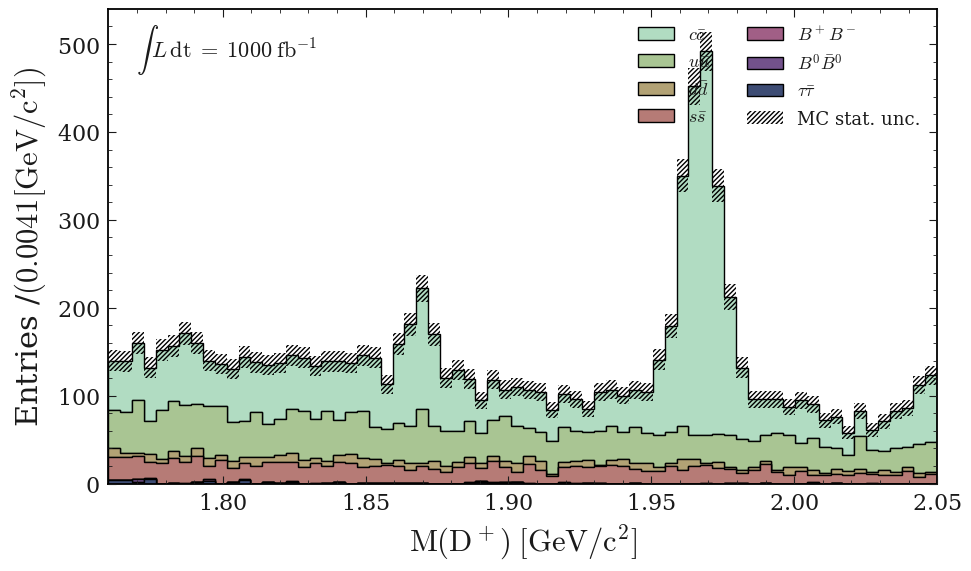

In [150]:

var = 'Dp_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (1.67,2.1)
xrange = (1.76,2.05)

nbins = 70
xlabel = "$\mathrm{M(D^+)}$"
# img_path = plot_directory + "/MC15ri_Dpetapip_pipi_pre_sel_DpM.png"
img_path = plot_directory + "/MC15ri_Dpetapip_pipi_tight_selv1_DpM.png"
img_path = plot_directory + "/MC15ri_Dpetapip_pipi_loose_v0_trainv1.png"


MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c^2]",luminosity=luminosity)
plt.tight_layout()
# plt.ylim(0,68000)
plt.savefig(img_path)


In [137]:
signal_pd = pd_ccbar.query('Dp_isSignal==1 & Dp_M>1.76 & Dp_M<1.95')
ccbar_bkg_pd = pd_ccbar.query('Dp_isSignal!=1 & Dp_M>1.76 & Dp_M<1.95')

bkg_pd_before = pd.concat([pd_taupair, pd_mixed, pd_charged,pd_ssbar, pd_ddbar,pd_uubar, ccbar_bkg_pd], ignore_index=True)
bkg_pd = bkg_pd_before.query(' Dp_M>1.76 & Dp_M<1.95')

In [138]:
def calculate_FOM( bkg_pd, sig_pd, cut_list, scale_factor, cut):
    
    FOM_list = list()
    
    for cut_value in cut_list:
    
        temp_cut = cut + str(cut_value) 
        temp_bkg_pd = bkg_pd.query(temp_cut)
        temp_sig_pd = sig_pd.query(temp_cut)

        nsig = len(temp_sig_pd)
        nbkg = len(temp_bkg_pd)

#         FOM = scale_factor*nsig/(math.sqrt(scale_factor*nsig + nbkg))
        FOM = scale_factor*nsig/(math.sqrt(scale_factor*nsig + nbkg))

        FOM_list.append(FOM)    
    
    return FOM_list

In [139]:
def calculate_eff( bkg_pd, sig_pd, cut_list, cut):
    
    eff_list = list()
    
    for cut_value in cut_list:
    
        #temp_cut = 'gamma_E > ' + str(cut_value) 
        temp_cut = cut + str(cut_value) 

        temp_sig_pd = sig_pd.query(temp_cut)

        nsig = len(temp_sig_pd)

        eff = nsig/(0.5*1e+6)
        eff_list.append(eff)    
    
    return eff_list

In [140]:
def calculate_purity( bkg_pd, sig_pd, cut_list, cut):
    
    purity_list = list()
    
    for cut_value in cut_list:
    
        #temp_cut = 'gamma_E > ' + str(cut_value) 
        temp_cut =  cut +  str(cut_value) 
        
        temp_sig_pd = sig_pd.query(temp_cut)

        nsig = len(temp_sig_pd)
        
        nREALsig = len(temp_sig_pd.query("Dp_isSignal==1"))
        
        #nbkg = len(temp_bkg_pd)

        purity = nREALsig/nsig
        purity_list.append(purity)    
    
    return purity_list

In [141]:
def plot_FOM_eff(FOM_cut_list, FOM_phig_list, eff_phig_list, purity_phig_list, xlabel ,offset=85):


    fig, host = plt.subplots(figsize=(9,6)) # (width, height) in inches    
    par1 = host.twinx()

    #host.set_xlim(2, 3.5)
    # host.set_ylim(0, 2)
    # par2.set_ylim(0, 4)
    #par1.set_ylim(0,0.16 )

    # par2.axis["right"] = new_fixed_axis(loc="right", axes=par2,
                                            # offset=(offset, 0))
    # par2.axis["right"].toggle(all=True)

    host.set_xlabel(xlabel)
    host.set_ylabel("FOM")
    par1.set_ylabel("Efficiency")

    # color1 = plt.cm.viridis(0)
    # color2 = plt.cm.viridis(0.5)
    # color3 = plt.cm.viridis(.9)
    color1 = 'r'
    color2 = 'g'
    color3 = 'b'

    p1, = host.plot(FOM_cut_list, FOM_phig_list,    color=color1, label="FOM")
    p2, = par1.plot(FOM_cut_list, eff_phig_list,    color=color2, label="Efficiency")

    
    lns = [p1, p2]
    host.legend(handles=lns, loc='best')
    # right, left, top, bottom
    offset = offset
    # par2.spines['right'].set_position(('outward', offset))

    # no x-ticks                 
    # par2.xaxis.set_ticks([])

    # Sometimes handy, same for xaxis
    # par2.yaxis.set_ticks_position('right')

    # Move "Velocity"-axis to the left
    # par2.spines['left'].set_position(('outward', 60))
    # par2.spines['left'].set_visible(True)
    # par2.yaxis.set_label_position('left')
    # par2.yaxis.set_ticks_position('left')

    host.yaxis.label.set_color(p1.get_color())
    par1.yaxis.label.set_color(p2.get_color())

    plt.title(r'$D^0 \to \rho^0 \gamma$')
    # plt.axvline(x=2.45,  color='orange', linestyle='dotted')

    # Adjust spacings w.r.t. figsize
    fig.tight_layout()

In [142]:
def plot_FOM_eff_purity(FOM_cut_list, FOM_phig_list, eff_phig_list, purity_phig_list, xlabel ,offset=85):


    fig, host = plt.subplots(figsize=(9,6)) # (width, height) in inches    
    par1 = host.twinx()
    par2 = host.twinx()

    #host.set_xlim(2, 3.5)
    # host.set_ylim(0, 2)
    # par2.set_ylim(0, 4)
    #par1.set_ylim(0,0.16 )
    par2.set_ylim(0.958,0.97 )

    # par2.axis["right"] = new_fixed_axis(loc="right", axes=par2,
                                            # offset=(offset, 0))
    # par2.axis["right"].toggle(all=True)

    host.set_xlabel(xlabel)
    host.set_ylabel("FOM")
    par1.set_ylabel("Efficiency")
    par2.set_ylabel("Purity")

    # color1 = plt.cm.viridis(0)
    # color2 = plt.cm.viridis(0.5)
    # color3 = plt.cm.viridis(.9)
    color1 = 'r'
    color2 = 'g'
    color3 = 'b'

    p1, = host.plot(FOM_cut_list, FOM_phig_list,    color=color1, label="FOM")
    p2, = par1.plot(FOM_cut_list, eff_phig_list,    color=color2, label="Efficiency")
    p3, = par2.plot(FOM_cut_list, purity_phig_list, color=color3, label="Purity")

    
    lns = [p1, p2, p3]
    host.legend(handles=lns, loc='best')
    # right, left, top, bottom
    offset = offset
    par2.spines['right'].set_position(('outward', offset))

    # no x-ticks                 
    # par2.xaxis.set_ticks([])

    # Sometimes handy, same for xaxis
    # par2.yaxis.set_ticks_position('right')

    # Move "Velocity"-axis to the left
    # par2.spines['left'].set_position(('outward', 60))
    # par2.spines['left'].set_visible(True)
    # par2.yaxis.set_label_position('left')
    # par2.yaxis.set_ticks_position('left')

    host.yaxis.label.set_color(p1.get_color())
    par1.yaxis.label.set_color(p2.get_color())
    par2.yaxis.label.set_color(p3.get_color())

    plt.title(r'$D^0 \to \rho^0 \gamma$')
    # plt.axvline(x=2.45,  color='orange', linestyle='dotted')

    # Adjust spacings w.r.t. figsize
    fig.tight_layout()

In [143]:
# pd_phigamma_sigMC = signal_pd
# print(len(pd_phigamma_sigMC))

In [144]:
# half_1_sigMC = '/media/jykim/T7/storage/01_recon/phi/D0_v26_half1M_1_pre_ext_signalMC_recon_mdst_phi.root'
# half_1_sigMC = '/media/jykim/T7/storage/01_recon/rho/D0_massveto_v2_half_1_pre_signalMC_recon_mdst_rho_*.root'

# base_filter='D0_M>1.8 && D0_M<1.9  && abs(Phi_M - 1.0195)< 0.011 && abs(Dstarp_Q-0.00593)<0.0006'
# base_filter='D0_M>1.8 && D0_M<1.9'
# base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Phi_M - 1.0195) < 0.011 && abs(Dstarp_delM-(2.0103-1.8648))<0.001  && Dstarp_CMS_p>2.5'
# base_filter=' D0_M>1.8 && D0_M<1.9 && abs(Phi_M - 1.0195) < 0.011 && abs(Dstarp_delM-(2.0103-1.8648))<0.001  && Dstarp_CMS_p>2.5'
# base_filter=' D0_M>1.8 && D0_M<1.9 && abs(Rho_M - 0.77526 ) < 0.15 && abs(Dstarp_delM-(2.0103-1.8648))<0.001 && Dstarp_CMS_p>2.5'
# base_filter += '&& gamma_E>0.45'

# pd_half_1_sigMC = get_pd(file=half_1_sigMC, tree=tree,base_filter=base_filter,variables=variables)


# scale_factor = len(pd_phigamma_sigMC)/len(pd_half_1_sigMC )
# print(scale_factor)

scale_factor = 1

max=3.776011486615472, cut value=0.9600000000000001


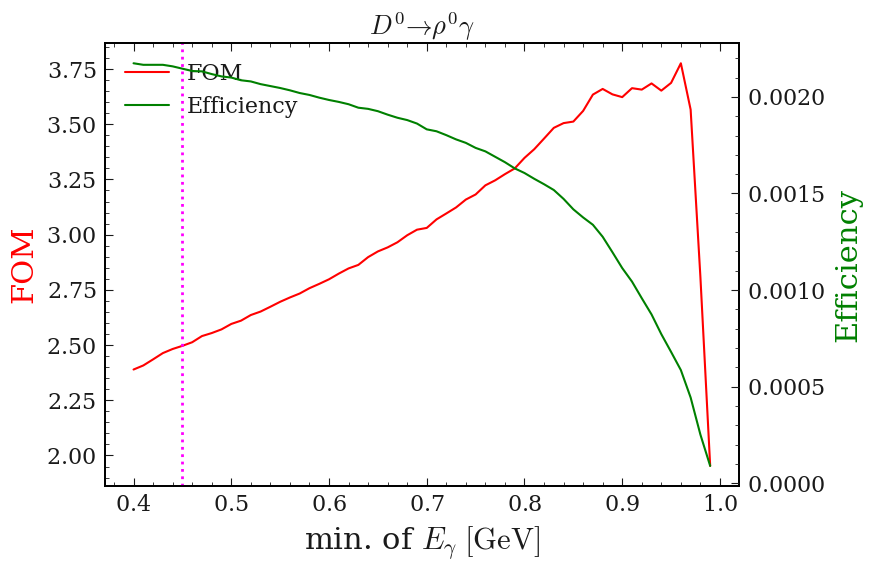

In [145]:
FOM_cut_list = np.linspace(0.4,0.99,60)
cut = 'bdt > '

FOM_phig_list = calculate_FOM(bkg_pd,signal_pd, FOM_cut_list,scale_factor, cut = cut  )
purity_phig_list = calculate_purity(bkg_pd, signal_pd, FOM_cut_list, cut =  cut)
eff_phig_list = calculate_eff(bkg_pd, signal_pd, FOM_cut_list, cut =  cut)

plot_FOM_eff(FOM_cut_list, FOM_phig_list, eff_phig_list, purity_phig_list,xlabel=r"min. of $E_{\gamma}\; [\mathrm{GeV}]$",offset=85)

max_index= FOM_phig_list.index(max(FOM_phig_list))
max_FOM = max(FOM_phig_list)
argmax_FOM = FOM_cut_list[max_index]
plt.axvline(x=0.45,  color='magenta', linestyle='dotted',lw=2)

# plt.savefig("MC1tri_rho_after_pre_ext_Eg_FOM.png")


print('max=' + str(max_FOM) + ', cut value=' + str(argmax_FOM))

[52495. 50600. 49399. 47874. 46667. 45417. 44493. 44576. 44581. 44008.
 41491. 40485. 39937. 40533. 39480. 37044. 36873. 36878. 35709. 33291.
 33202. 33062. 32426. 30424. 29799. 28406. 27592. 25911. 24819. 23583.
 22184. 20856. 19840. 18756. 18002. 16952. 15155. 13917. 12273. 10746.
  9316.  8216.  7258.  6348.  5198.  4184.  3563.  2901.  2269.  1883.]
fitst_bin_entries=52495.0


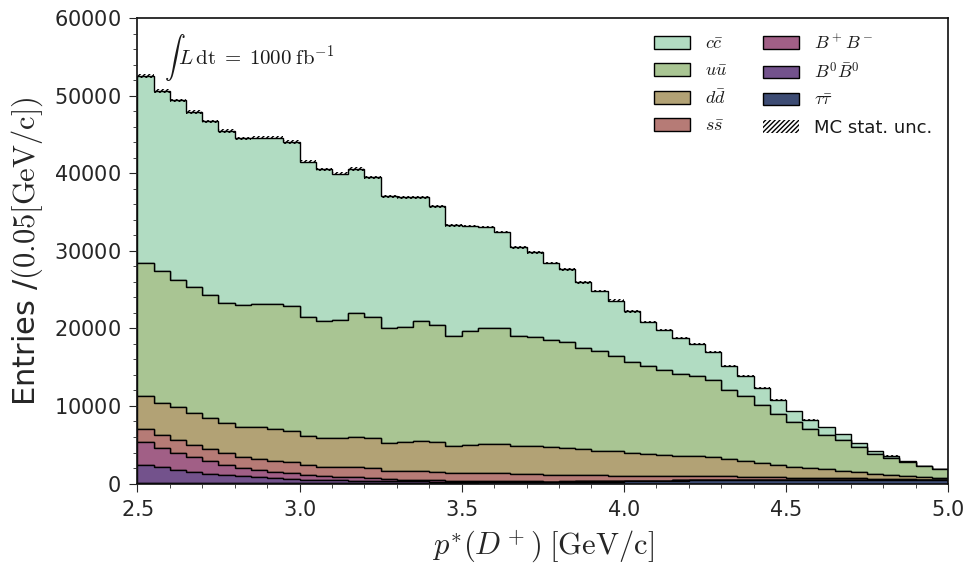

In [18]:
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

var = 'Dp_CMS_p'
xrange = (2.5,5)
nbins = 50
xlabel = "$p^{*}(D^+)$"
img_path = plot_directory + "/MC15ri_Dpetapip_pipi_pre_sel_DpCMSp.png"


MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c]",luminosity=luminosity,force_range=xrange)
plt.tight_layout()

# plt.savefig(img_path)


In [39]:
# var = 'Dp_cosAngleBetweenMomentumAndVertexVector'
# data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

# xrange = (-1,1)
# nbins = 50
# xlabel = r"$D^{+}$ cosAngleBetweenMomentumAndVertexVector"
# img_path = plot_directory + "/MC15ri_Dpetapip_pipi_pre_sel_Dp_cosAngleBetweenMomentumAndVertexVector.png"


# MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity=luminosity,force_range=xrange)
# plt.tight_layout()

# plt.savefig(img_path)


[0.00000e+00 6.54000e+03 5.53960e+04 1.04774e+05 1.25330e+05 1.27415e+05
 1.19122e+05 1.08635e+05 9.42860e+04 8.57760e+04 7.74820e+04 6.73670e+04
 5.99260e+04 5.29930e+04 4.48620e+04 4.04950e+04 3.49980e+04 2.85930e+04
 2.41220e+04 2.09060e+04 1.74130e+04 1.27140e+04 9.95300e+03 8.14900e+03
 6.83400e+03 5.29500e+03 4.29800e+03 3.61400e+03 2.80300e+03 2.21300e+03
 1.97200e+03 1.78500e+03 1.41100e+03 1.14900e+03 1.07400e+03 9.98000e+02
 8.52000e+02 7.61000e+02 6.40000e+02 5.70000e+02 5.03000e+02 4.40000e+02
 3.58000e+02 2.94000e+02 2.59000e+02 2.17000e+02 1.79000e+02 1.13000e+02
 5.50000e+01 2.10000e+01]
fitst_bin_entries=0.0


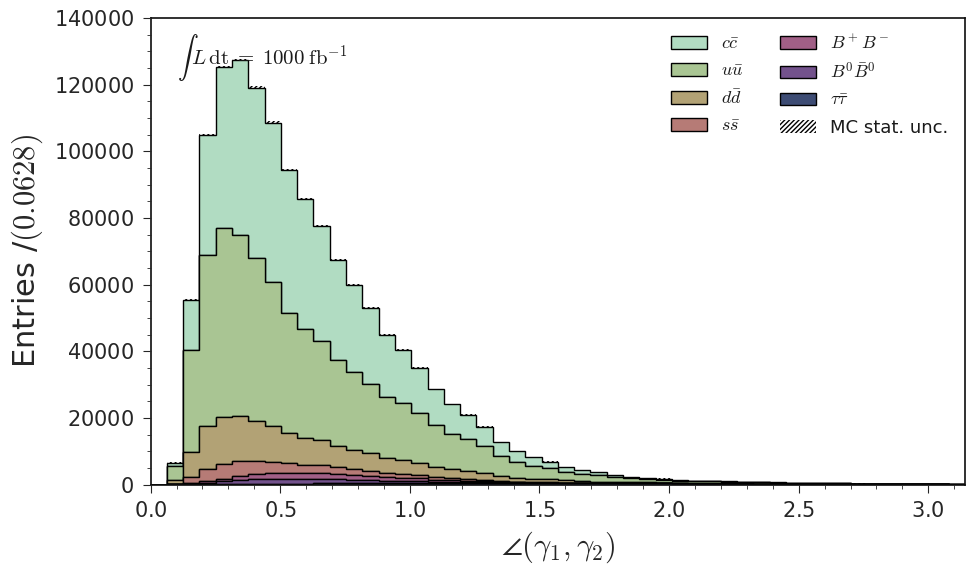

In [19]:
var = 'eta_Pi0_daughterAngle_0_1'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (0,math.pi)
nbins = 50
xlabel = r"$\angle (\gamma_1,\gamma_2)$"
img_path = plot_directory + "/MC15ri_Dpetapip_pipi_pre_sel_etapip_eta_Pi0_daughterAngle_0_1.png"


MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity=luminosity,force_range=xrange)
plt.tight_layout()

# plt.savefig(img_path)

[ 238882.  243500.  249820.  261554.  278647.  297713.  322964.  353088.
  389454.  431950.  484047.  542206.  608194.  680305.  766284.  859753.
  969756. 1095360. 1232176. 1367233. 1485418. 1583186. 1640032. 1561021.
 1331445. 1328344. 1507886. 1552747. 1497872. 1419007. 1306772. 1182584.
 1052856.  933004.  832587.  745995.  664652.  593747.  530335.  475515.
  427082.  384636.  349162.  319566.  295472.  274887.  261202.  249627.
  244851.  240543.]
fitst_bin_entries=238882.0


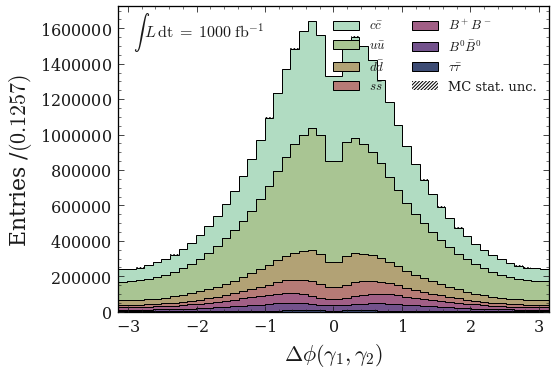

In [41]:
var = 'eta_Pi0_daughterDiffOfPhi_0_1'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (-math.pi,math.pi)
nbins = 50
xlabel = r"$\Delta \phi(\gamma_1,\gamma_2)$"
img_path = plot_directory + "/MC15ri_Dpetapip_pipi_pre_sel_etapip_eta_Pi0_daughterDiffOfPhi_0_1.png"


MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity=luminosity,force_range=xrange)
plt.tight_layout()

plt.savefig(img_path)

[       0.        0.        0.        0.        0.   341694.   332807.
   329075.   340097.   346788.   365727.   388191.   414187.   441755.
   464526.   486359.   524508.   554701.   574625.   618061.   587346.
   590743.   600300.   578588.   565838.   511730.   484074.   463048.
   443651.   425162.   410546.   393292.   366344.   340516.   323967.
   313281.   305459.   302655.   300689.   304074.   309525.   321201.
   338645.   365162.   410337.   478966.   594325.   812619.  2865993.
 16313742.]
fitst_bin_entries=0.0


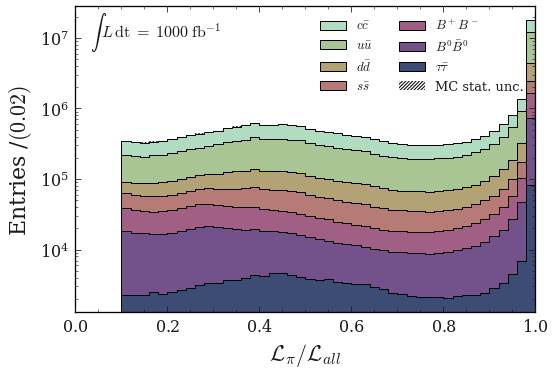

In [44]:
var = 'Pip_pionID'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (0,1)
nbins = 50
xlabel = r"$\mathcal{L}_{\pi}/\mathcal{L}_{all}$"
img_path = plot_directory + "/MC15ri_Dpetapip_pipi_pre_sel_etapip_Pip_pionID.png"


MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity=luminosity,force_range=xrange)
plt.yscale('log')

plt.tight_layout()

plt.savefig(img_path)

In [46]:
# var = 'Pip_pionIDNN'
# data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

# xrange = (0,1)
# nbins = 50
# xlabel = r"DNN $\mathcal{L}_{\pi}/\mathcal{L}_{all}$"
# img_path = plot_directory + "/MC15ri_Dpetapip_pipi_pre_sel_etapip_Pip_pionIDNN.png"


# MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity=luminosity,force_range=xrange)
# plt.yscale('log')

# plt.tight_layout()

# plt.savefig(img_path)

[1.263202e+06 6.833100e+04 1.849200e+04 7.342000e+03 3.480000e+03
 1.748000e+03 1.040000e+03 6.510000e+02 4.310000e+02 2.710000e+02
 1.930000e+02 1.350000e+02 9.700000e+01 7.200000e+01 6.900000e+01
 4.900000e+01 3.000000e+01 4.300000e+01 3.000000e+01 2.300000e+01
 2.100000e+01 1.600000e+01 1.700000e+01 1.800000e+01 1.100000e+01
 1.000000e+01 1.300000e+01 8.000000e+00 1.700000e+01 5.000000e+00
 1.200000e+01 1.100000e+01 5.000000e+00 9.000000e+00 4.000000e+00
 5.000000e+00 3.000000e+00 3.000000e+00 4.000000e+00 2.000000e+00
 5.000000e+00 1.000000e+00 7.000000e+00 2.000000e+00 5.000000e+00
 5.000000e+00 1.000000e+00 1.000000e+00 4.000000e+00 1.000000e+00]
fitst_bin_entries=1263202.0


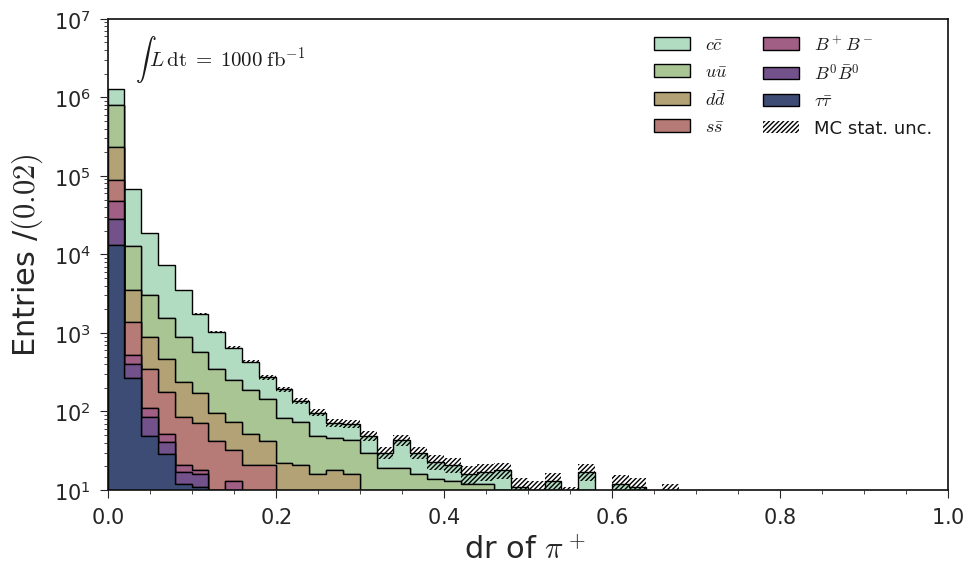

In [22]:
var = 'Pip_dr'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (0,1)
nbins = 50
xlabel = r"dr of $\pi^+$ "
img_path = plot_directory + "/MC15ri_Dpetapip_pipi_pre_sel_etapip_Pip_dr.png"


MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity=luminosity,force_range=xrange)
plt.yscale('log')

plt.tight_layout()

# plt.savefig(img_path)

In [49]:
var = 'Pip_dz'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (-3,3)
nbins = 50
xlabel = r"dz of $\pi^+$"
img_path = plot_directory + "/MC15ri_Dpetapip_pipi_pre_sel_etapip_Pip_dz.png"


MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity=luminosity,force_range=xrange)
plt.yscale('log')

plt.tight_layout()

plt.savefig(img_path)

KeyError: 'Pip_dz'

In [38]:
pd_ccbar

,__experiment__,__run__,__event__,Dp_M,Dp_isSignal,Dp_CMS_p,etapip_Eta_M,etapip_Eta_isSignal,etapip_Eta_daughterDiffOfPhi_0_1,etapip_Eta_daughterAngle_0_1,...,eta_Pi0_daughterDiffOfPhi_0_1,eta_Pip_pionID,eta_Pim_pionID,eta_Pip_pionIDNN,eta_Pim_pionIDNN,eta_Pip_mcPDG,eta_Pim_mcPDG,Pip_pionID,Pip_mcPDG,Pip_dr
0,1003,0,39597571,1.739505,NaN,2.500390,0.539355,NaN,-0.334168,0.387020,...,-1.036867,1.000000,0.372755,1.000000,0.999937,211.0,-211.0,0.999838,-211.0,0.002138
1,1003,0,39597843,1.605385,0.0,2.840073,0.517964,0.0,0.088200,0.088210,...,1.180757,0.999997,0.999958,0.953778,0.990642,211.0,-211.0,0.835206,-211.0,0.981222
2,1003,0,39597843,1.665297,0.0,2.900674,0.517964,0.0,0.088200,0.088210,...,1.180757,0.999997,0.999958,0.953778,0.990642,211.0,-211.0,0.660983,-211.0,0.168197
3,1003,0,39597843,1.948129,0.0,2.881411,0.517964,0.0,0.088200,0.088210,...,1.180757,0.999997,0.999958,0.953778,0.990642,211.0,-211.0,0.988273,-211.0,0.148974
4,1003,0,39598195,2.082142,0.0,2.531889,0.548404,0.0,-0.994237,0.712364,...,-0.623936,0.990679,0.917305,0.999268,1.000000,211.0,-211.0,0.223845,-211.0,0.002318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13004116,1003,0,172499417,1.736102,NaN,2.911517,0.546531,NaN,-0.585402,0.492618,...,1.683241,0.114848,0.452891,0.996791,1.000000,211.0,-211.0,0.213016,-321.0,0.003416
13004117,1003,0,172499659,1.816576,NaN,2.537393,0.562960,NaN,-0.005052,0.200479,...,-1.532427,0.906163,0.477166,0.999836,0.487852,211.0,-321.0,0.753038,211.0,0.338211
13004118,1003,0,172499659,1.821560,NaN,2.560320,0.559221,NaN,-0.005052,0.200479,...,-1.295670,0.906163,0.477166,0.999836,0.487852,211.0,-321.0,0.753038,211.0,0.338211
13004119,1003,0,172499770,1.983822,0.0,2.599950,0.540366,0.0,0.216980,0.300520,...,-0.260272,1.000000,0.999998,0.999772,1.000000,211.0,-211.0,0.989505,211.0,0.004771
